# 📘 Einführung in Markov-Ketten

In dieser Übung lernen Sie, wie man Markov-Ketten in Python umsetzen und Vorhersagen für zukünftige Zustände machen kann.


## Beispiel: Wettermodell

Angenommen, das Wetter kann **sonnig** oder **regnerisch** sein. Die Übergangswahrscheinlichkeiten lauten:

- Wenn es heute sonnig ist, ist es morgen mit 80 % wieder sonnig, zu 20 % regnet es.
- Wenn es heute regnet, ist es morgen mit 60 % wieder regnerisch, zu 40 % sonnig.

## Übergangsmatrix erstellen

Die Übergangsmatrix kann in Python mit dem Package `numpy` (kurz `np`) erstellt werden.

In [21]:
# Library numpy importieren (einmal ausführen reicht)
import numpy as np

In [22]:
# Zustände: 0 = Sonne, 1 = Regen
P = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

P

array([[0.8, 0.2],
       [0.4, 0.6]])

<div class="alert alert-success">

## Aufgabe: Übergangsmatrix erstellen
Ein Schüler nutzt auf seinem Smartphone entweder Instagram (I) oder TikTok (T). Wenn er zuerst Instagram nutzt, so nutzt er mit einer Wahrscheinlichkeit von $0.6$ wieder Instagram und mit $0.4$ TikTok. Nach einer TikTok-Nutzung entscheidet er sich mit $0.1$ für Instagram und mit $0.9$ für TikTok. Erstellen Sie die Übergangsmatrix `Q`.
</div>

In [23]:
Q = np.array([
    [0.6, 0.4],  # Nach Instagram: 60% wieder Instagram, 40% TikTok
    [0.1, 0.9]   # Nach TikTok: 10% Instagram, 90% TikTok
])

Q

array([[0.6, 0.4],
       [0.1, 0.9]])

## Entwicklung der Zustände berechnen

Gegeben ist, dass es heute regnerisch ist. Wir können die Wahrscheinlichkeit, dass es in einem oder zwei Tagen sonnig ist, berechnen, indem wir wiederholt den Zustandsvektor (`pi0`, danach `pi1` etc.)  mit der Matrix `P` multiplizieren. Matrixmultiplikationen können in Python einfach mit dem `@`-Operator durchgeführt werden.

In [24]:
# Zustandsvektor am Anfang: keine Sonne (0%), Regen (100%)
pi0 = np.array([0, 1])

# Zustandsvektor nach einem Tag (Wahrscheinlichkeiten, dass es sonnig ist oder regnet)
pi1 = pi0 @ P
print("Nach 1 Tag:", pi1)

# Nach zwei Tagen
pi2 = pi1 @ P
print("Nach 2 Tagen:", pi2)

print("Wahrscheinlichkeit, dass es nach 2 Tagen sonnig wird:", pi2[0]) # das erste Element mit Index 0 ist die Wahrscheinlichkeit für Sonne

Nach 1 Tag: [0.4 0.6]
Nach 2 Tagen: [0.56 0.44]
Wahrscheinlichkeit, dass es nach 2 Tagen sonnig wird: 0.56


<div class="alert alert-success">

## Aufgabe: Entwicklung der Zustände berechnen

Wie gross ist die Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet? Sie können die oben berechneten Variablen `pi2`, `P` etc. auch hier weiterverwenden.

**Schreiben Sie Ihr Resultat als Zahl auf das Tablet**.
</div>

In [25]:
# Wahrscheinlichkeit, dass es nach 3 Tagen regnet
pi3 = pi2 @ P
print("Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet:", pi3[1])

Wahrscheinlichkeit, dass es nach 3 Tagen immer noch regnet: 0.376


## Zufallssimulation einer Markov-Kette

Mit `random.choices` kann eine Abfolge von Zuständen basierend auf einer Übergangsmatrix simuliert werden. Die Funktion `random.choices` kann mit den Wahrscheinlichkeiten der Übergänge gefüttert werden, um den nächsten Zustand zu bestimmen. Dabei wird eine Zufallszahl generiert, die den nächsten Zustand bestimmt. Die Übergangswahrscheinlichkeiten sind in der Matrix `P` definiert, und die Simulation läuft für eine bestimmte Anzahl von Schritten.

Im untenstehenden Beispiel wird eine Markov-Kette simuliert, die zwischen zwei Zuständen wechselt. Der Startzustand ist Sonne (0), und die Übergangswahrscheinlichkeiten sind in der Matrix `P` definiert. Die Simulation läuft für 20 Schritte, und der aktuelle Zustand wird in jedem Schritt ausgegeben.

**Simulation** bedeutet, dass man mit dem Computer nachahmt, wie sich ein System in der Wirklichkeit verhalten würde. Dabei werden Zufallszahlen genutzt, um verschiedene Abläufe oder Entscheidungen nachzustellen. So kann man beobachten, wie sich etwas über viele Schritte entwickelt, ohne es in echt ausprobieren zu müssen.

In [26]:
# importiere Bibliothek, um Zufallszahlen zu generieren
import random

In [32]:
### CODEBLOCK A

# Anfangszustand
zustand = "Sonne"

# Liste der simulierten Zustände (wird in der Schleife fortlaufend erweitert)
history = [zustand]

# Anzahl Simulationsschritte
schritte = 2000

for i in range(schritte):
    # Zufällig nächsten Zustand bestimmen (mit Übergangswahrscheinlichkeiten)
    if zustand == "Sonne":
        # Übergangswahrscheinlichkeiten vom Zustand "Sonne"
        wahrscheinlichkeit = P[0]
    else:
        # Übergangswahrscheinlichkeiten vom Zustand "Regen"
        wahrscheinlichkeit = P[1]
    
    # generiere nächsten simulierten Zustand mit Übergangswahrscheinlichkeiten
    zustand = random.choices(["Sonne", "Regen"], weights=wahrscheinlichkeit).pop()
    
    # Füge simulierten Zustand zur Liste hinzu
    history.append(zustand)

print(history)

['Sonne', 'Regen', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Regen', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Regen', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Sonne', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Regen', 'Regen', 'Regen', 'Regen', 'Regen', 'Regen', 'Regen', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 'Sonne', 

Folgende Funktion zeigt auf, wie sich die Verteilung der Zustände im Verlauf der Simulationsschritte ändert. Sie müssen nichts an der Funktion ändern, führen Sie diesen Code lediglich aus.

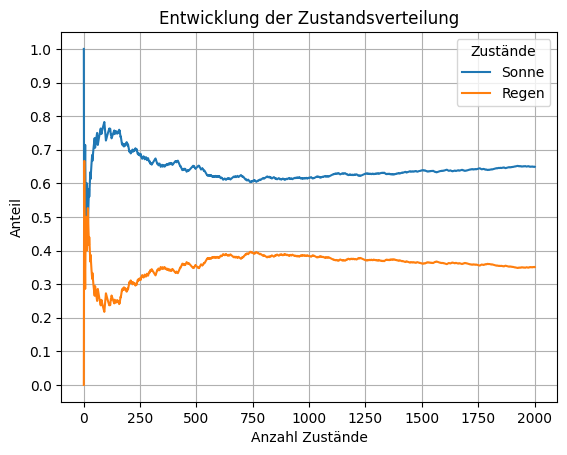

In [38]:
### CODEBLOCK B
import pandas as pd
import matplotlib.pyplot as plt

def plot_state_percentages(history, legend=True):
    """
    Plottet den prozentualen Verlauf beliebig vieler Zustände aus einer History-Liste.
    """
    unique_states = list(dict.fromkeys(history))  # Reihenfolge beibehalten
    counts = {state: 0 for state in unique_states}
    percentages = {state: [] for state in unique_states}

    for i, zustand in enumerate(history, 1):
        counts[zustand] += 1
        for state in unique_states:
            percentages[state].append(counts[state] / i)

    df = pd.DataFrame(percentages)
    df.index = np.arange(1, len(history)+1)
    df.index.name = "Anzahl Zustände"
    df.plot()
    plt.xlabel("Anzahl Zustände")
    plt.ylabel("Anteil")
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.grid()
    plt.title("Entwicklung der Zustandsverteilung")
    if legend:
        plt.legend(title="Zustände")
    else:
        plt.legend().remove()
    plt.show()

plot_state_percentages(history)

<div class="alert alert-success">

# Aufgabe: Zufallssimulation einer Markov-Kette
Führen Sie die zwei obigen Code-Blöcke (A und B) zwei weitere Male aus. Ändert sich die Grafik? Weshalb?
</div>

**Antwort**: Ja, die Grafik sieht jedes Mal anders aus. Dies ist, weil wir eine **Zufalls**-Simulation gemacht haben.

<div class="alert alert-success">

Führen Sie die zwei obigen Code-Blöcke (A und B) statt für 20 Schritte für **2000 Schritte** einige Male aus. Wie verändert sich die Verteilung der Zustände? Wie sind sind die Zustände langfristig verteilt? Überprüfen Sie Ihre Antwort mithilfe der Moodle-Lernkontrolle!
</div>

**Antwort**: Ja, die Verteilung wird mit der Zeit stabil (ca. 2/3 Sonne, 1/3 Regen).

# Zusatzaufgaben

<div class="alert alert-warning">
Wie gross ist die Wahrscheinlichkeit, dass der Schüler nach drei Nutzungen bei Instagram landet, wenn er mit Tiktok startet?
</div>

In [35]:
# Anfangszustand: startet mit TikTok (Index 1)
pi0_tiktok = np.array([0, 1])

# Nach einer Nutzung
pi1_tiktok = pi0_tiktok @ Q

# Nach zwei Nutzungen
pi2_tiktok = pi1_tiktok @ Q

# Nach drei Nutzungen
pi3_tiktok = pi2_tiktok @ Q

# Wahrscheinlichkeit, dass der Schüler nach drei Nutzungen bei Instagram (Index 0) ist
print("Wahrscheinlichkeit, dass der Schüler nach drei Nutzungen bei Instagram landet:", pi3_tiktok[0])

Wahrscheinlichkeit, dass der Schüler nach drei Nutzungen bei Instagram landet: 0.17500000000000002


<div class="alert alert-warning">
Führen Sie eine Zufallssimulation für die Zustände "Instagram" und "TikTok" durch. Visualisieren Sie das Resultat der Simulationen.
</div>

In [46]:
Q = np.array([
    [1, 0],  # Nach Instagram: 60% wieder Instagram, 40% TikTok
    [.5,.5]   # Nach TikTok: 10% Instagram, 90% TikTok
])

Q

array([[1. , 0. ],
       [0.5, 0.5]])

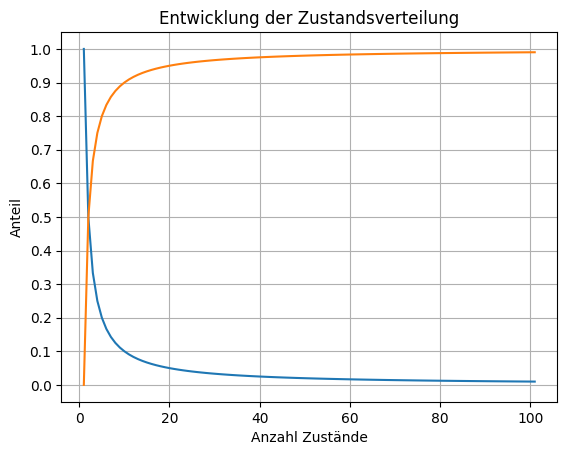

In [57]:
# Zufallssimulation für "Instagram" und "TikTok"
zustand = "TikTok"
history_apps = [zustand]
schritte_apps = 100  # z.B. 100 Schritte

for _ in range(schritte_apps):
    if zustand == "Instagram":
        wahrscheinlichkeit = Q[0]
    else:
        wahrscheinlichkeit = Q[1]
    zustand = random.choices(["Instagram", "TikTok"], weights=wahrscheinlichkeit).pop()
    history_apps.append(zustand)


plot_state_percentages(history_apps, legend=False)